In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
titanic = pd.read_csv("final_dataset.csv")

In [4]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [5]:
titanic.tail()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
886,0,27.0,0,0,13.00,0,1,0,0,1,0,1,0
887,1,19.0,0,0,30.00,1,0,0,0,1,1,0,0
888,0,28.0,1,2,23.45,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.00,0,1,1,0,0,1,0,0
890,0,32.0,0,0,7.75,0,1,0,1,0,0,0,1


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

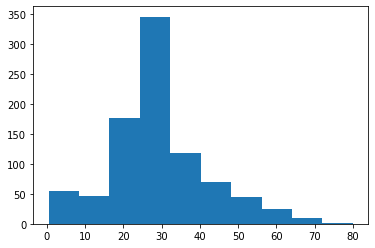

In [8]:
# Draws a histogram based on the age property
plt.hist(titanic.Age)

In [10]:
# Changing the categorical gender variable to numerical
# titanic['Sex'][titanic['Sex']=='male'] == 1

In [11]:
dataset = titanic.copy()

In [12]:
# Convert the dataframe to a numpy array
# Keep everything but the survived column
X = np.asarray(dataset.drop('Survived', 1))
# Use the survived column in y
y = np.asarray(dataset['Survived'])
# SVM relies on labels not 0 and 1
# Convert all the labels that go to minus one and the rest
# Then the labels will be 1 or -1
y[y == 0] = -1

In [13]:
# Check the first 20 y values
y[0:20]

array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1], dtype=int64)

In [14]:
# Splits data into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape

(712, 12)

In [16]:
X_test.shape

(179, 12)

In [17]:
y_train.shape

(712,)

In [18]:
y_test.shape

(179,)

In [19]:
# Scales common features to a common scale
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

In [20]:
svmModel = SVC(kernel = 'rbf',C=2,gamma = 0.9)
svmModel.fit(X_train_normalized,y_train)
Y_pred = svmModel.predict(X_test_normalized)
print(round(accuracy_score(y_test, Y_pred)*100,2))

81.56
